# Getting Started Examples

Example code that is in the getting started doc.

## States

In [1]:
import censusdis.data as ced
import censusdis.values as cev

# American Community Survey 5-Year Data
# https://www.census.gov/data/developers/data-sets/acs-5year.html
DATASET = "acs/acs5"

# The year we want data for.
YEAR = 2020

# This are the census variables for total population and median household income.
# For more details, see
#
#     https://api.census.gov/data/2020/acs/acs5/variables.html,
#     https://api.census.gov/data/2020/acs/acs5/variables/B01003_001E.html, and
#     https://api.census.gov/data/2020/acs/acs5/variables/B19013_001E.html.
#
TOTAL_POPULATION_VARIABLE = "B01003_001E"
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

# The variables we are going to query.
VARIABLES = ["NAME", TOTAL_POPULATION_VARIABLE, MEDIAN_HOUSEHOLD_INCOME_VARIABLE]

In [2]:
# Get the value of our variables for every state in the
# year we have chosen.
df_states = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    state="*",
)

In [3]:
print(df_states)

   STATE                  NAME  B01003_001E  B19013_001E
0     42          Pennsylvania     12794885        63627
1     06            California     39346023        78672
2     54         West Virginia      1807426        48037
3     49                  Utah      3151239        74197
4     36              New York     19514849        71117
5     11  District of Columbia       701974        90842
6     02                Alaska       736990        77790
7     12               Florida     21216924        57703
8     45        South Carolina      5091517        54864
9     38          North Dakota       760394        65315
10    23                 Maine      1340825        59489
11    13               Georgia     10516579        61224
12    01               Alabama      4893186        52035
13    33         New Hampshire      1355244        77923
14    41                Oregon      4176346        65667
15    56               Wyoming       581348        65304
16    04               Arizona 

## Counties

In [4]:
from censusdis.states import STATE_NJ

df_counties = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    state=STATE_NJ,
    county="*",
)

In [5]:
print(df_counties)

   STATE COUNTY                           NAME  B01003_001E  B19013_001E
0     34    003      Bergen County, New Jersey       931275       104623
1     34    009    Cape May County, New Jersey        92701        72385
2     34    015  Gloucester County, New Jersey       291745        89056
3     34    021      Mercer County, New Jersey       368085        83306
4     34    027      Morris County, New Jersey       492715       117298
5     34    033       Salem County, New Jersey        62754        64234
6     34    039       Union County, New Jersey       555208        82644
7     34    001    Atlantic County, New Jersey       264650        63680
8     34    005  Burlington County, New Jersey       446301        90329
9     34    007      Camden County, New Jersey       506721        70957
10    34    011  Cumberland County, New Jersey       150085        55709
11    34    013       Essex County, New Jersey       798698        63959
12    34    017      Hudson County, New Jersey     

In [6]:
df_counties["B01003_001E"].sum()

8885418

## Regions

In [7]:
df_region = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    region="*",
)

In [8]:
print(df_region)

  REGION              NAME  B01003_001E  B19013_001E
0      2    Midwest Region     68219726        62054
1      3      South Region    124605822        59816
2      4       West Region     77726849        72464
3      1  Northeast Region     56016911        72698


## Block Groups

In [9]:
COUNTY_ESSEX_NJ = "013"  # See county query above.

df_bg = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    state=STATE_NJ,
    county=COUNTY_ESSEX_NJ,
    block_group="*",
    set_to_nan=cev.ALL_SPECIAL_VALUES,
)

In [10]:
print(df_bg[:10].to_string(line_width=200))
print()
print("...")
print()
print(df_bg[-10:].to_string(line_width=200))

  STATE COUNTY   TRACT BLOCK_GROUP                                                      NAME  B01003_001E  B19013_001E
0    34    013  000100           2   Block Group 2, Census Tract 1, Essex County, New Jersey         1826      31250.0
1    34    013  000200           2   Block Group 2, Census Tract 2, Essex County, New Jersey         2156      39944.0
2    34    013  000400           1   Block Group 1, Census Tract 4, Essex County, New Jersey         2121      41736.0
3    34    013  000600           1   Block Group 1, Census Tract 6, Essex County, New Jersey         2363      44705.0
4    34    013  000700           2   Block Group 2, Census Tract 7, Essex County, New Jersey         2321      32382.0
5    34    013  000800           1   Block Group 1, Census Tract 8, Essex County, New Jersey         1811      78100.0
6    34    013  000900           1   Block Group 1, Census Tract 9, Essex County, New Jersey         1066      16125.0
7    34    013  001000           1  Block Group 

## Query Geographies

In [11]:
import censusdis.geography as cgeo

specs = cgeo.geo_path_snake_specs(DATASET, YEAR)

In [12]:
import pprint

pprint.pprint(specs)

{'010': ['us'],
 '020': ['region'],
 '030': ['division'],
 '040': ['state'],
 '050': ['state', 'county'],
 '060': ['state', 'county', 'county_subdivision'],
 '067': ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 '070': ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 '140': ['state', 'county', 'tract'],
 '150': ['state', 'county', 'tract', 'block_group'],
 '155': ['state', 'place', 'county_or_part'],
 '160': ['state', 'place'],
 '170': ['state', 'consolidated_city'],
 '172': ['state', 'consolidated_city', 'place_or_part'],
 '230': ['state', 'alaska_native_regional_corporation'],
 '250': ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 '251': ['american_indian_area_alaska_native_area_hawaiian_home_land',
         'tribal_subdivision_remainder'],
 '252': ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 '254': ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 '256'

## CSAs

In [13]:
df_csa = ced.download(DATASET, YEAR, VARIABLES, combined_statistical_area="*")

In [14]:
print(df_csa.iloc[:10].to_string(line_width=200))
print()
print("...")
print()
print(df_csa.iloc[-10:].to_string(line_width=200))

  COMBINED_STATISTICAL_AREA                                                     NAME  B01003_001E  B19013_001E
0                       104                               Albany-Schenectady, NY CSA      1169019        69275
1                       106                   Albuquerque-Santa Fe-Las Vegas, NM CSA      1156289        55499
2                       107                               Altoona-Huntingdon, PA CSA       167640        51497
3                       108                            Amarillo-Pampa-Borger, TX CSA       308297        56120
4                       118                          Appleton-Oshkosh-Neenah, WI CSA       407758        65838
5                       120                         Asheville-Marion-Brevard, NC CSA       538785        54033
6                       122  Atlanta--Athens-Clarke County--Sandy Springs, GA-AL CSA      6770764        68938
7                       140                                  Bend-Prineville, OR CSA       215482        67851
8

In [15]:
gdf_counties = ced.download(
    DATASET, YEAR, VARIABLES, state="*", county="*", with_geometry=True
)

In [16]:
gdf_counties[-1:]

,STATE,COUNTY,NAME,B01003_001E,B19013_001E,geometry
3220,27,153,"Todd County, Minnesota",24603,54502.0,"POLYGON ((-95.15557 46.36888, -95.15013 46.368..."


(-2943848.7075262154, 3021197.728943075, -2350693.676190874, 879141.3287656317)

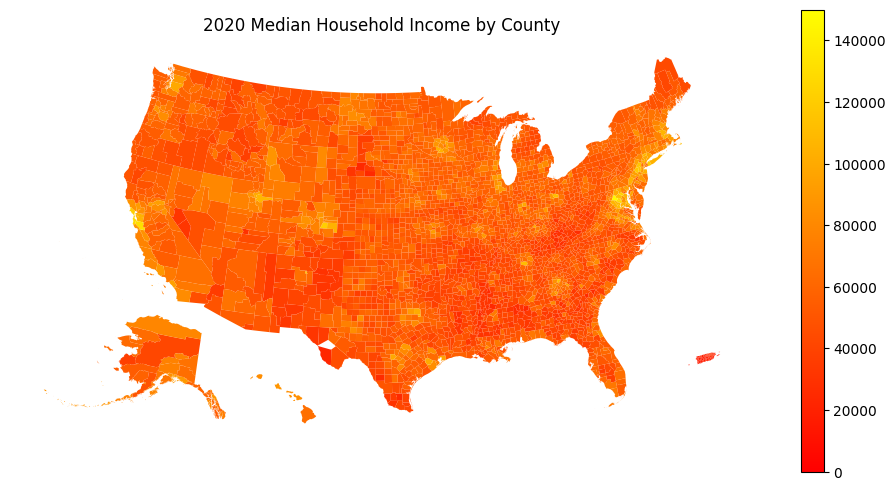

In [17]:
import matplotlib.pyplot as plt


import censusdis.maps as cem

ax = cem.plot_us(
    gdf_counties,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="autumn",
    legend=True,
    vmin=0.0,
    vmax=150_000,
    figsize=(12, 6),
)

ax.set_title(f"{YEAR} Median Household Income by County")

ax.axis("off")